# CCN and INP

Code written to plot vertical profiles of CCN, INP, and vertical distribution of CCN and feature mask.


Code written by Gourihar Kulkarni to demonstrate how RNCCN VAP from ARM can be used to understand the CCN and INP budgets.


####  Learning Objective: What is the CCN and INP budget in the atmosphere?

In [188]:
import netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
import xarray as xr
%config InlineBackend.figure_format='retina'

import seaborn as sns
sns.set_style('ticks')

In [189]:
# Function to compute mean excluding zero and -ve values along a specific axis
def mean_excluding_zeros(arr, axis):
    mask = arr > 0
    sum_ = np.sum(arr * mask, axis=axis)
    count = np.sum(mask, axis=axis)
    return sum_ / count

In [202]:
fpath = ('')
fname = "sgprnccnprof1kulkarniC1.c1.20230521.000500.nc"
nc = netCDF4.Dataset(fpath+fname)

file_details = xr.open_dataset(fpath+fname)
# print(file_details.info())

In [191]:
# Read the required variables
height = nc.variables['height'][:]    # Read 'height'
CCN1   = nc.variables['ccn_1'][:]     # Read 'ccn_1' (SS = 0%)
CCN2   = nc.variables['ccn_2'][:]     # Read 'ccn_2' (SS = 0.1%)
CCN3   = nc.variables['ccn_3'][:]     # Read 'ccn_3' (SS = 0.2%)
CCN4   = nc.variables['ccn_4'][:]     # Read 'ccn_4' (SS = 0.4%)
CCN5   = nc.variables['ccn_5'][:]     # Read 'ccn_5' (SS = 0.8%)
CCN6   = nc.variables['ccn_6'][:]     # Read 'ccn_6' (SS = 1%)
CCN7   = nc.variables['ccn_7'][:]     # Read 'ccn_7'

SS  = nc.variables['supersaturation_setpoint'][:]    
# print(SS) 
cbh  = nc.variables['cbh'][:]    
# print(cbh) 

## Tasks after successfuly running this code:

This code plots 4 figures.

The CCN at different supersaturations $S$ was obtained by doing:

$$ CCN_{i, s} = N_{CCN, s} \times \frac{Extinction_{i}}{Extinction_{bottom}} $$

where extinction was taken from lidar measurements and $N_{CCN}$ from ground-based CCN measurements. The second term is essentially a scaling factor that is the same for all supersaturations.

#### Part 1: Use CCN3 for SS = 0.2% and plot the INP


In [203]:
feature_mask  = nc.variables['feature_mask'][:]  

shape = CCN2.shape
# print(shape)  

shape2 = height.shape
# print(shape2) 

start = 61   #103
end   = 67   #108

CCN2_sub = CCN2[start:end]  # 17th UTC hour start = will be 103
CCN3_sub = CCN3[start:end]  # 17th UTC hour start = will be 103
CCN4_sub = CCN4[start:end]  
CCN6_sub = CCN6[start:end]  

shape4 = CCN2_sub.shape
# print(shape4)  

# Calculate the mean of each column
CCN2_sub_mean = mean_excluding_zeros(CCN2_sub , axis=0)
CCN3_sub_mean = mean_excluding_zeros(CCN3_sub , axis=0)
CCN4_sub_mean = mean_excluding_zeros(CCN4_sub , axis=0)
CCN6_sub_mean = mean_excluding_zeros(CCN6_sub , axis=0)

shape3= CCN2_sub_mean.shape
# print(shape3) 

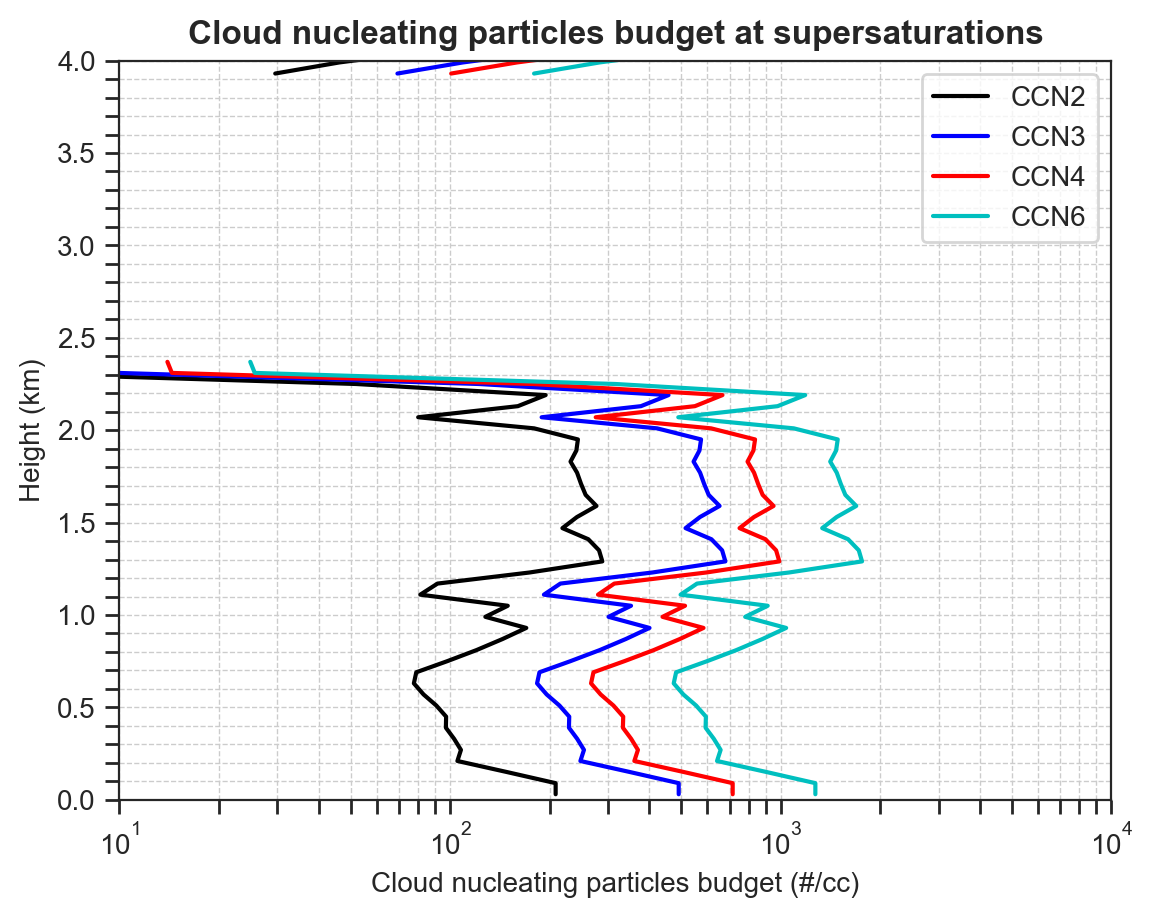

In [204]:
# CCN plotting
plt.figure(1)

# Create the plot
plt.plot(CCN2_sub_mean, height, 'k', label='CCN2')
plt.plot(CCN3_sub_mean, height, 'b', label='CCN3')
plt.plot(CCN4_sub_mean, height, 'r', label='CCN4')
plt.plot(CCN6_sub_mean, height, 'c', label='CCN6')

plt.xscale('log')
plt.ylim([0, 4])
plt.xlim([10, 10000])

plt.tick_params(axis='both', which='both', length=5, width=1)
plt.minorticks_on()

plt.xlabel('Cloud nucleating particles budget (#/cc)')
plt.ylabel('Height (km)')

plt.legend()
plt.title('Cloud nucleating particles budget at supersaturations', weight = 'bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.show()

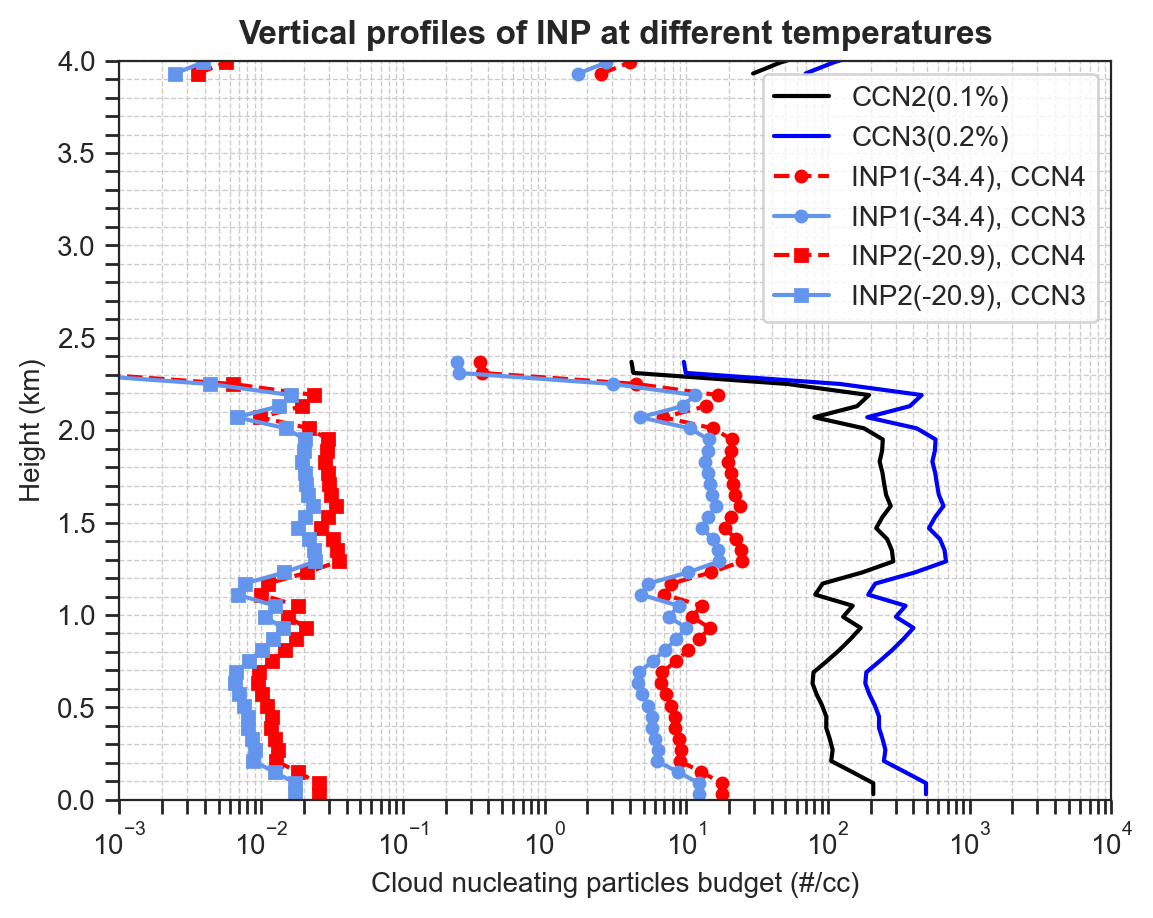

In [211]:
# CCN and INP plotting
plt.figure(2)

plt.plot(CCN2_sub_mean, height, 'k', label='CCN2(0.1%)')
plt.plot(CCN3_sub_mean, height, 'b', label='CCN3(0.2%)')
# plt.plot(CCN4_sub_mean, height, 'r', label='CCN4(0.4%)')
# plt.plot(CCN6_sub_mean, height, 'c', label='CCN6(1.0%)')

plt.plot(INP_Temp1_CCN4, height, marker='o', linestyle='--', color='red', label='INP1(-34.4), CCN4', markersize = 4)
plt.plot(INP_Temp1_CCN3, height, marker='o', linestyle='-', color='cornflowerblue', label='INP1(-34.4), CCN3', markersize = 4)

plt.plot(INP_Temp2_CCN4, height, marker='s', linestyle='--', color='red', label='INP2(-20.9), CCN4', markersize = 4)
plt.plot(INP_Temp2_CCN3, height, marker='s', linestyle='-', color='cornflowerblue', label='INP2(-20.9), CCN3', markersize = 4)

plt.xscale('log')
plt.ylim([0, 4])
plt.xlim([0.001, 10000])

plt.tick_params(axis='both', which='both', length=5, width=1)
plt.minorticks_on()

plt.xlabel('Cloud nucleating particles budget (#/cc)')
plt.ylabel('Height (km)')

plt.title('Vertical profiles of INP at different temperatures', weight = 'bold')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### Part 2: Plot heat map for different CCN vs. SS

This is the code for CCN3 (0.2% supersaturation).

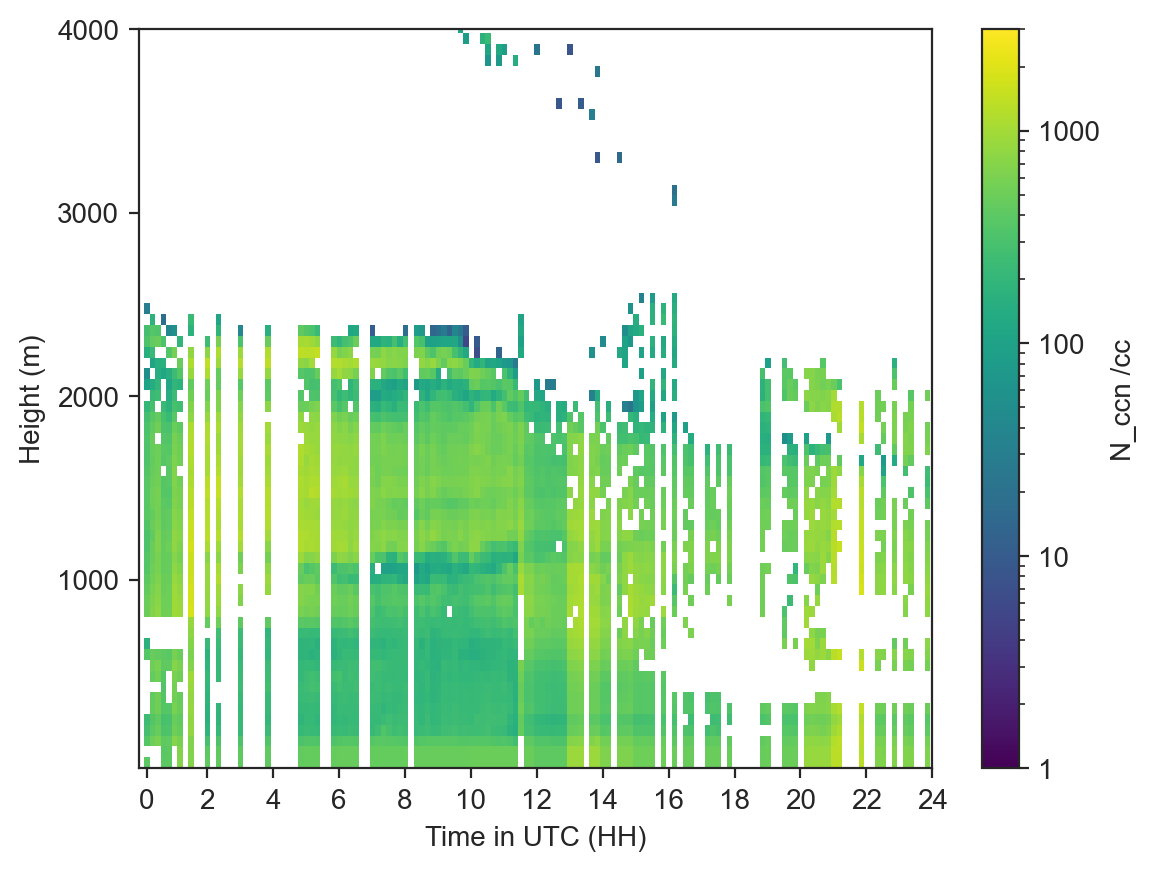

In [213]:
import matplotlib.colors as mcolors

ccn_ghan_SS = CCN3.T # Transpose the data
ccn_ghan_SS[ccn_ghan_SS == -9999] = np.nan
ccn_ghan_SS[np.isnan(ccn_ghan_SS)] = 0

# Parameters
x1 = [1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
y1 = [17, 34, 51, 68]
y = [1000, 2000, 3000, 4000]

fig, ax = plt.subplots()

# Define color limits and colormap
clim = [1, 3000]

norm = mcolors.LogNorm(vmin=clim[0], vmax=clim[1])
cax = ax.imshow(ccn_ghan_SS, norm=norm, cmap='viridis', aspect='auto')

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_ticks([1, 10, 100, 1000])
cbar.set_ticklabels(['1', '10', '100', '1000'])

cbar.set_label('N_ccn /cc')

# Set axis labels and ticks
ax.set_yticks(y1)
ax.set_yticklabels(y)
ax.set_xticks(x1)
ax.set_xticklabels(x)
ax.set_xlabel('Time in UTC (HH)')
ax.set_ylabel('Height (m)')

ax.set_ylim(68)

# Set y-axis direction
ax.invert_yaxis()
plt.show()

Now, iterate over the CCN_i variables (i = \[1, 6\]) and plot heatmaps of CCN.

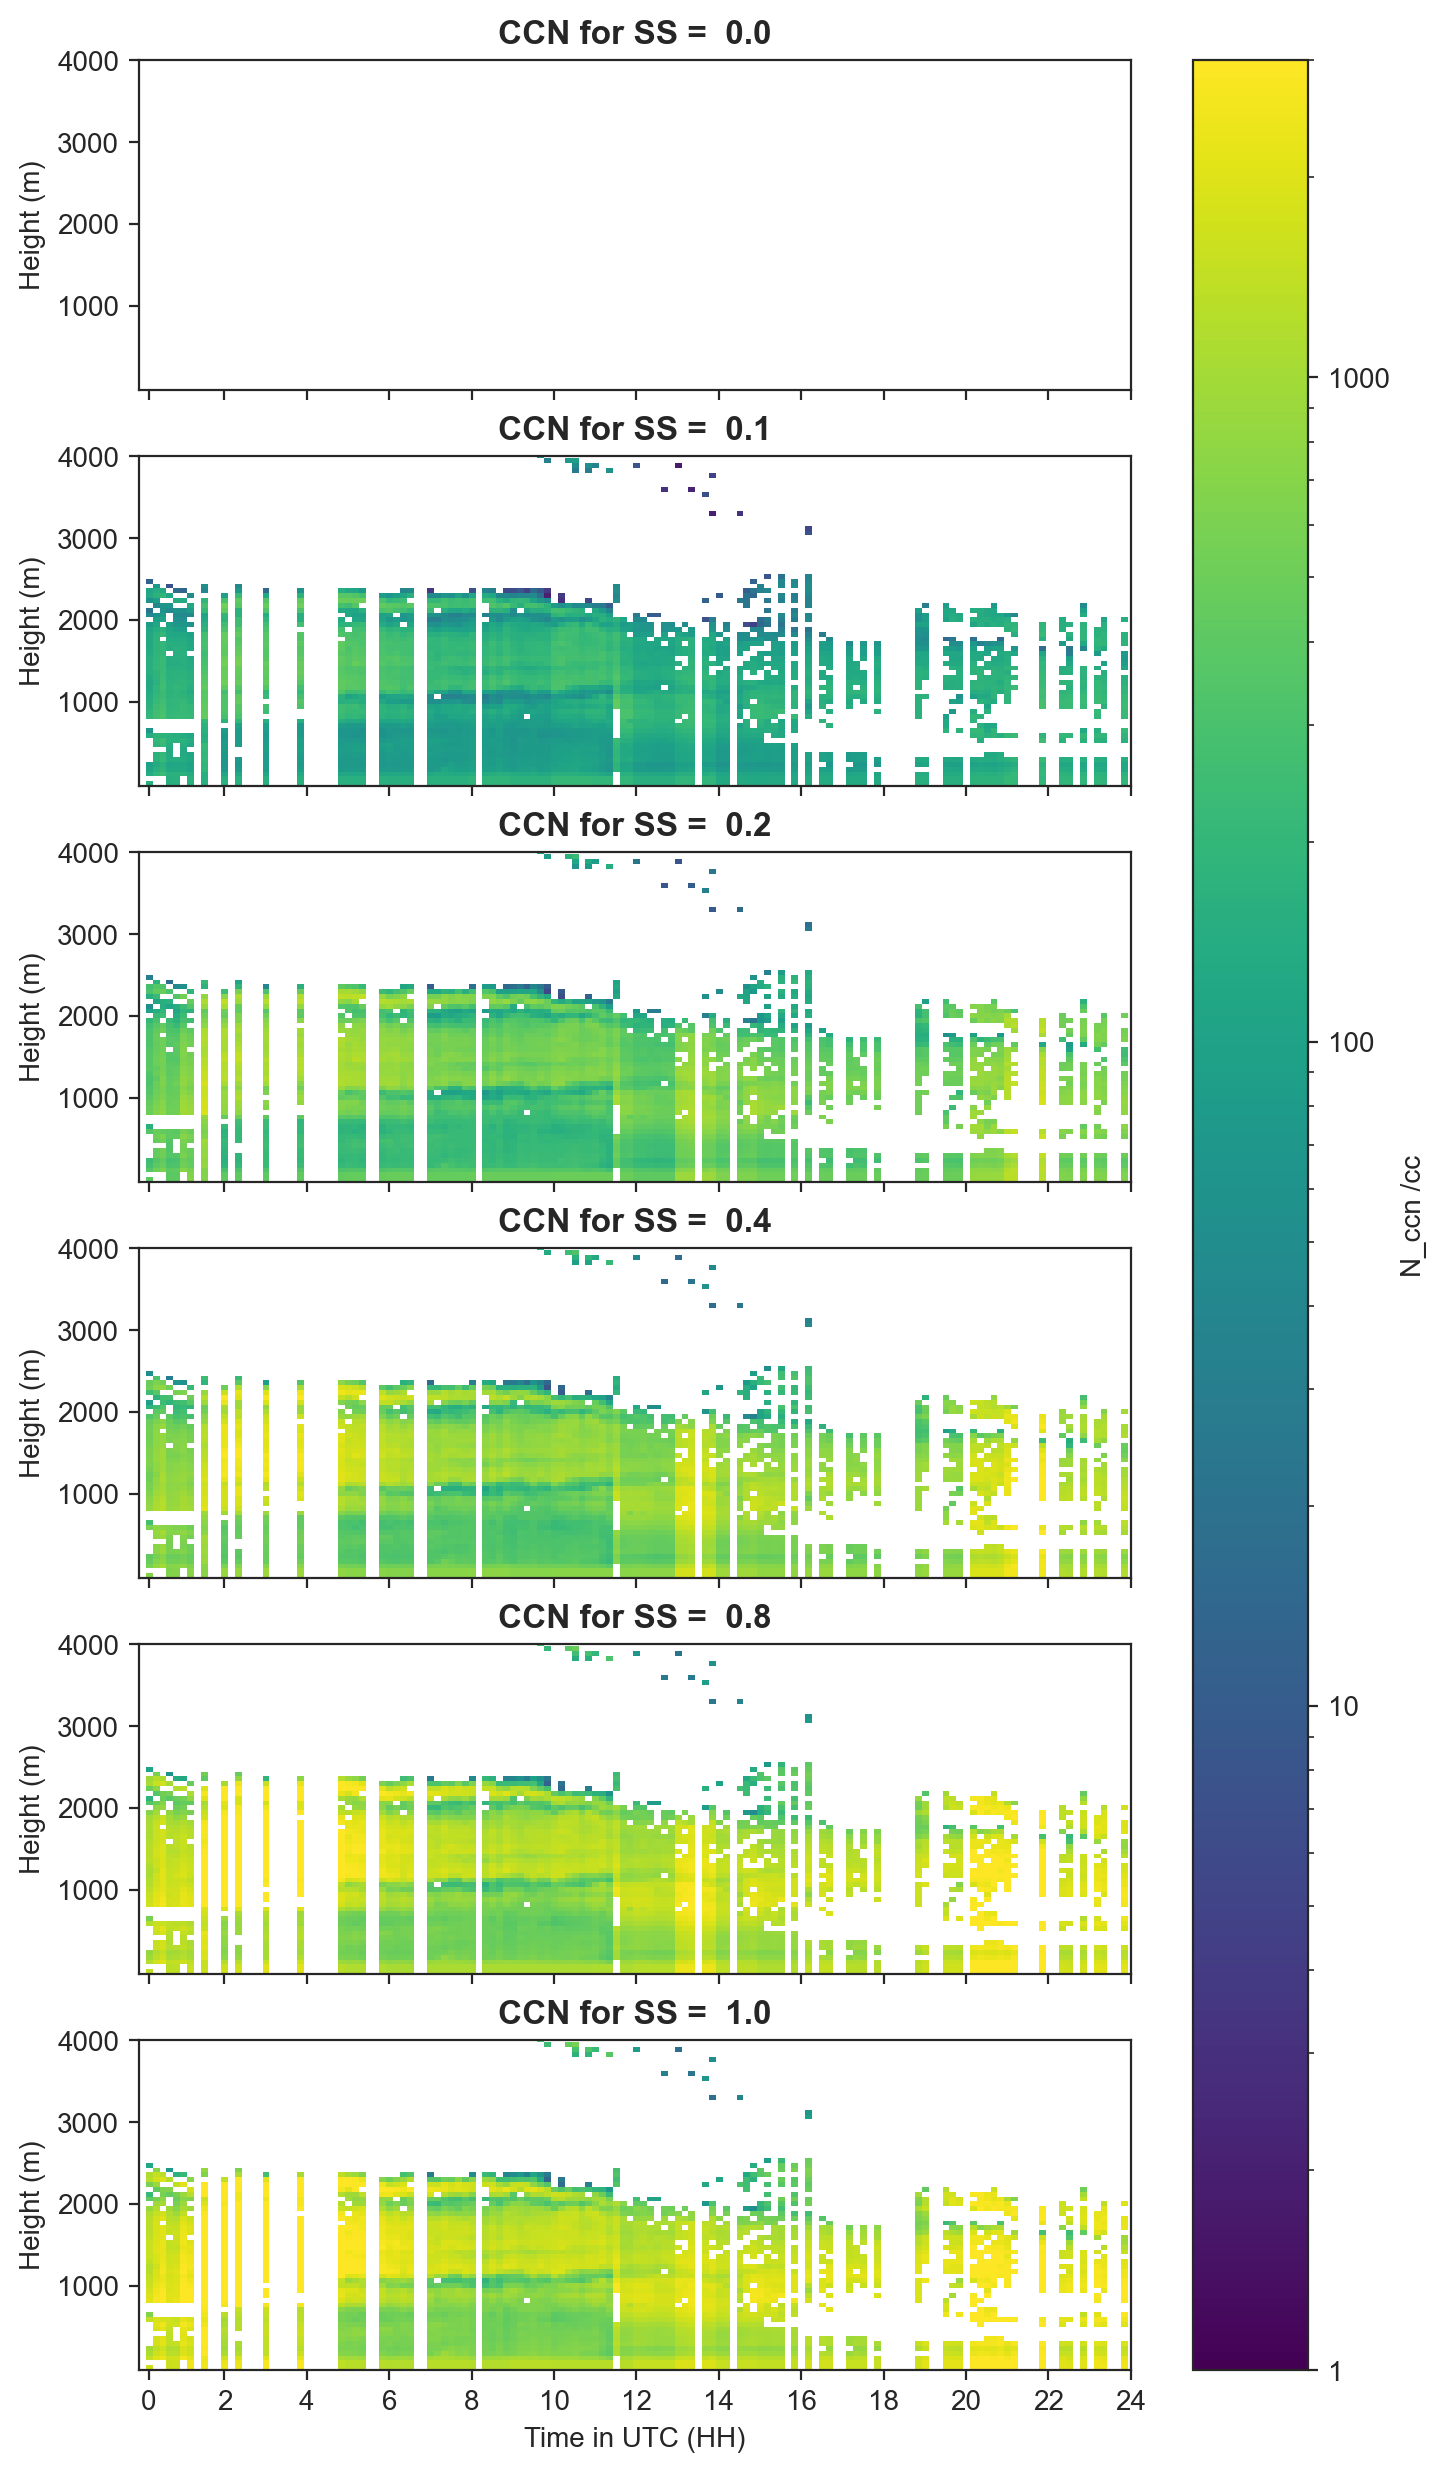

In [215]:
fig, ax = plt.subplots(6,1, figsize = (8, 15), sharex = True)

# Parameters
x1 = [1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
y1 = [17, 34, 51, 68]
y = [1000, 2000, 3000, 4000]

# Define color limits and colormap
# clim = [1, 3000]
# norm = mcolors.LogNorm(vmin=clim[0], vmax=clim[1])

for i in range(1, 7):
    var = f'ccn_{i}'
    ccn = nc.variables[f'ccn_{i}'][:]
    
    ccn_ghan_SS = ccn.T # Transpose the data
    ccn_ghan_SS[ccn_ghan_SS == -9999] = np.nan
    ccn_ghan_SS[np.isnan(ccn_ghan_SS)] = 0

    cax = ax[i-1].imshow(ccn_ghan_SS, norm=norm, cmap='viridis', aspect='auto')
    ss = SS[i - 1]
    ax[i - 1].set_title(f'CCN for SS = {ss : .1f}', weight = 'bold')

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_ticks([1, 10, 100, 1000])
cbar.set_ticklabels(['1', '10', '100', '1000'])

cbar.set_label('N_ccn /cc')

# Set y-axis direction
for ax_i in ax:
    ax_i.set_ylim(68)
    ax_i.set_yticks(y1)
    ax_i.set_yticklabels(y)
    ax_i.set_xticks(x1)
    ax_i.set_xticklabels(x)
    ax_i.set_ylabel('Height (m)')
    ax_i.invert_yaxis()

ax[5].set_xlabel('Time in UTC (HH)')
plt.show()

#### Part 3: Use FF = 0.01 and Nccn for SS = 0.2; plot the heat map for INP.

In [216]:
# TEMP 3
FF3 = 0.01
INP_CCN3 = CCN3 * FF3

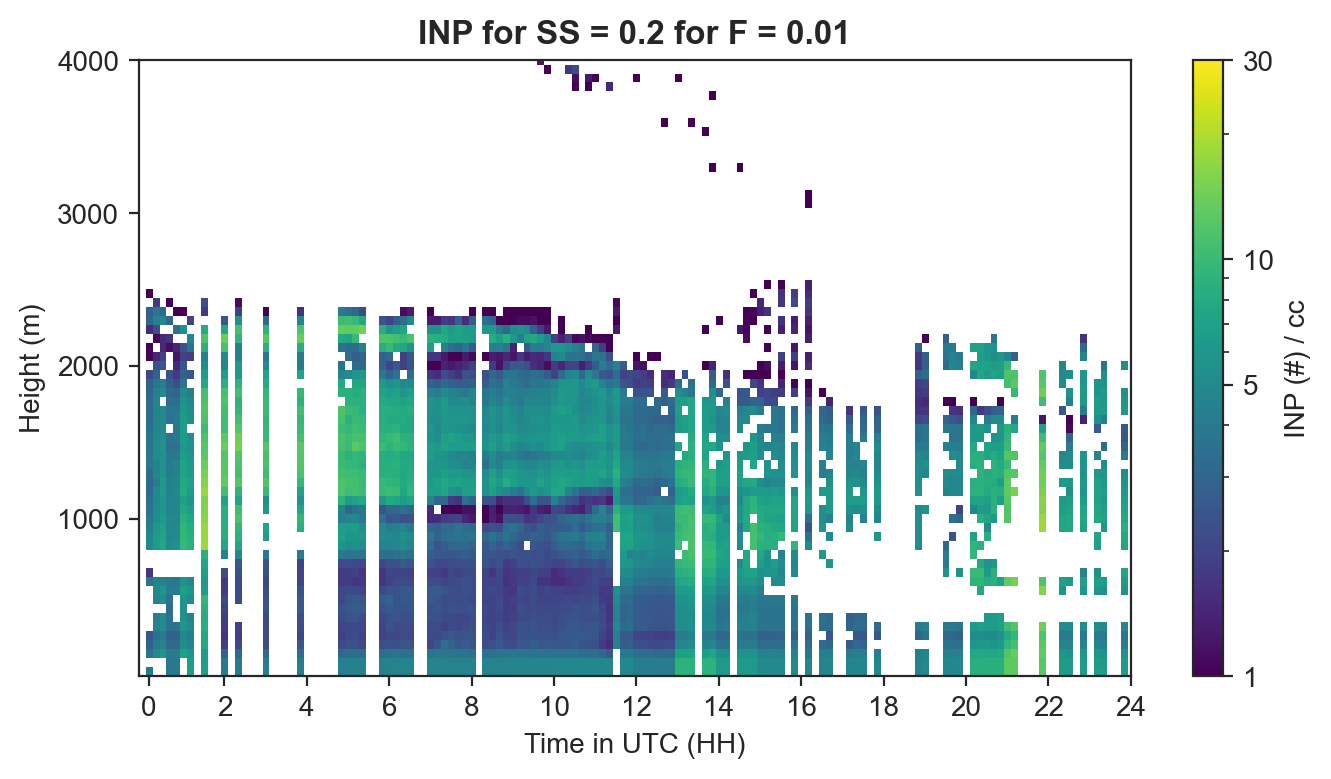

In [221]:
# Parameters
x1 = [1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
y1 = [17, 34, 51, 68]
y = [1000, 2000, 3000, 4000]

fig, ax = plt.subplots(figsize = (8,4))

# Define color limits and colormap
clim = [1, 30]

norm = mcolors.LogNorm(vmin=clim[0], vmax=clim[1])
cax = ax.imshow(INP_CCN3.T, norm=norm, cmap='viridis', aspect='auto')

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_ticks([1, 5, 10, 30])
cbar.set_ticklabels(['1', '5', '10', '30'])

cbar.set_label('INP (#) / cc')

# Set axis labels and ticks
ax.set_yticks(y1)
ax.set_yticklabels(y)
ax.set_xticks(x1)
ax.set_xticklabels(x)
ax.set_xlabel('Time in UTC (HH)')
ax.set_ylabel('Height (m)')

ax.set_ylim(68)
ax.set_title('INP for SS = 0.2 for F = 0.01', weight = 'bold')

# Set y-axis direction
ax.invert_yaxis()
plt.show()

#### Now, show that the vertical profile of CCN at a time with cloud cover has a discontinuity.

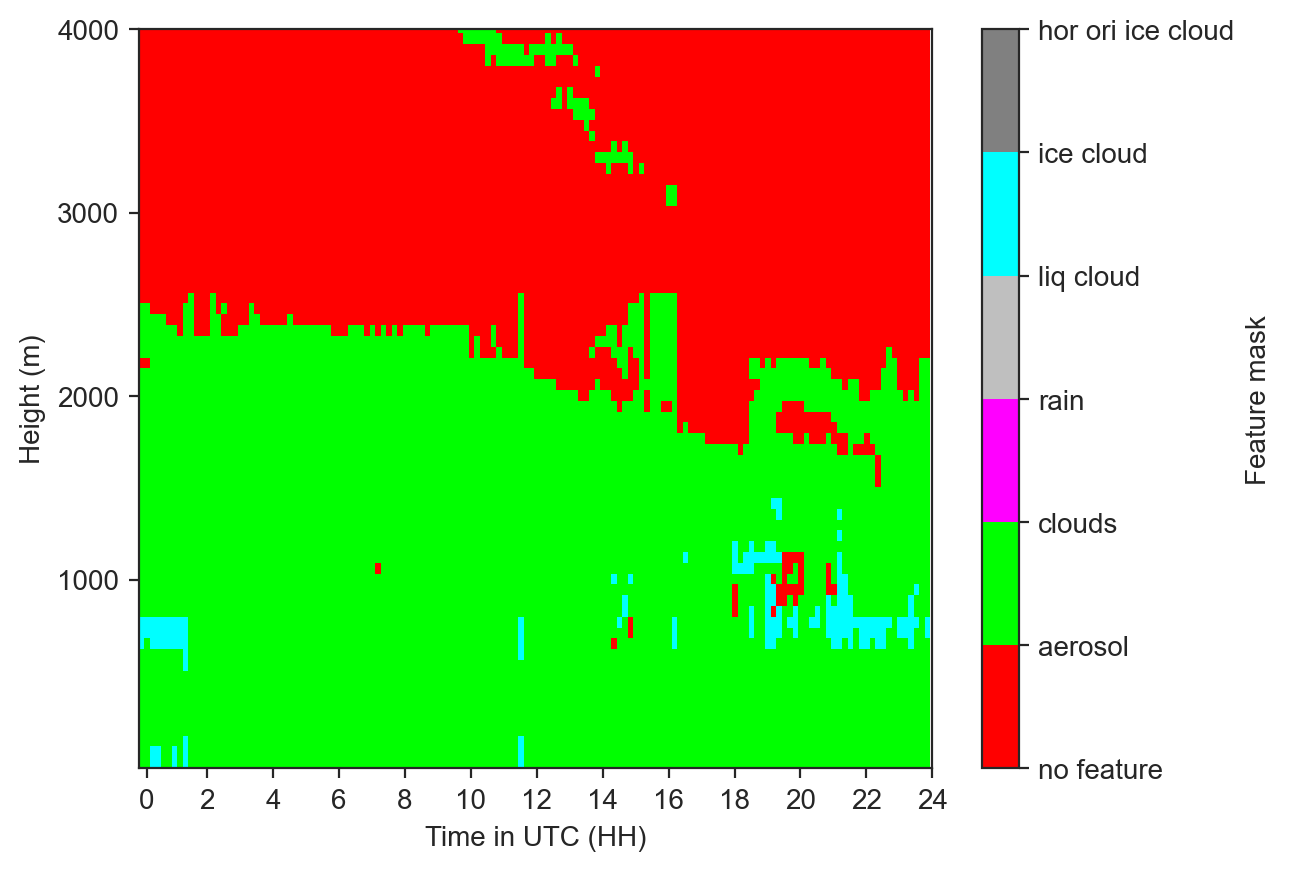

In [222]:
# Heat map plotting of feature mask or scaled image of feature mask
feature_maskT = feature_mask.T

fig, ax = plt.subplots()

# Define color limits and colormap
clim = [1, 101]
norm = mcolors.BoundaryNorm(boundaries=[1, 3, 5, 9, 21, 37, 101], ncolors=7)
cmap = mcolors.ListedColormap([
    [1, 0, 0],   # red
    [0, 1, 0],   # green
    [1, 0, 1],   # magenta
    [0.75, 0.75, 0.75],   # silver
    [0, 1, 1],   # cyan
    [0, 0, 1],   # blue
    [0.5, 0.5, 0.5]  # gray
])
cax = ax.imshow(feature_maskT , norm=norm, cmap=cmap, aspect='auto')

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, ticks=[1, 3, 5, 9, 21, 37, 101])
cbar.set_ticklabels(['no feature', 'aerosol', 'clouds', 'rain', 'liq cloud', 'ice cloud', 'hor ori ice cloud'])
cbar.set_label('Feature mask')

# Set axis labels and ticks
ax.set_yticks(y1)
ax.set_yticklabels(y)
ax.set_xticks(x1)
ax.set_xticklabels(x)
ax.set_xlabel('Time in UTC (HH)')
ax.set_ylabel('Height (m)')
ax.set_ylim(68)

# Set y-axis direction
ax.invert_yaxis()
plt.show()
#%%

In [290]:
start = 6 * 22 # At 10 minute intervals
end   = (6 * 23) - 1

ccn_22 = CCN3[start:end]
ccn_22_mask = feature_mask[start:end]

ccn_22_mask = np.where(ccn_22_mask == 21, ccn_22_mask, np.nan)
ind = np.argwhere(ccn_22_mask == 21)

# Calculate the mean of each column
CCN2_sub_mean = mean_excluding_zeros(ccn_22, axis=0)

In [291]:
# Find the lowest and highest heights of the ice cloud at 22:00Z
lowest_height = height[ind[:,1].min()]
highest_height = height[ind[:,1].max()]

In [300]:
highest_height

0.81

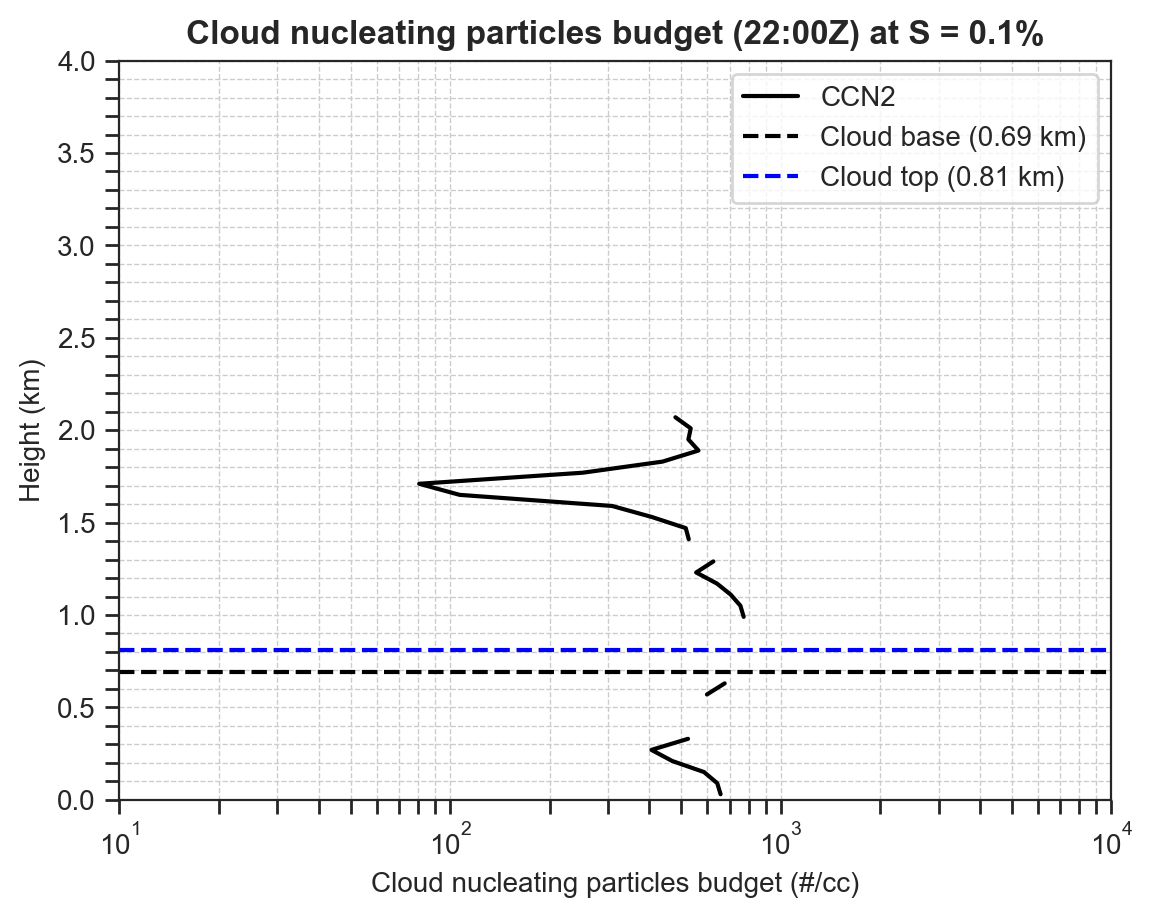

In [304]:
# CCN plotting
plt.figure(1)

# Create the plot
plt.plot(CCN2_sub_mean, height, 'k', label='CCN2')

plt.xscale('log')
plt.ylim([0, 4])
plt.xlim([10, 10000])

plt.tick_params(axis='both', which='both', length=5, width=1)
plt.minorticks_on()

plt.xlabel('Cloud nucleating particles budget (#/cc)')
plt.ylabel('Height (km)')

plt.axhline(lowest_height, color = 'k', ls = 'dashed', label = 'Cloud base (0.69 km)')
plt.axhline(highest_height, color = 'blue', ls = 'dashed', label = 'Cloud top (0.81 km)')

plt.legend()
plt.title('Cloud nucleating particles budget (22:00Z) at S = 0.1%', weight = 'bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.show()

In [324]:
# Automatically detect measurements with clouds

feature_mask  = nc.variables['feature_mask'][:]  
ind = np.argwhere((feature_mask == 21) | (feature_mask == 37))

times = ind[:,0]

CCN2_only_cloudy = CCN2[times]  # 17th UTC hour start = will be 103
CCN2_clear = CCN2[~times]  # 17th UTC hour start = will be 103

# Calculate the mean of each column
CCN2_cloudy = mean_excluding_zeros(CCN2_only_cloudy, axis=0)
CCN2_clear = mean_excluding_zeros(CCN2_clear, axis=0)

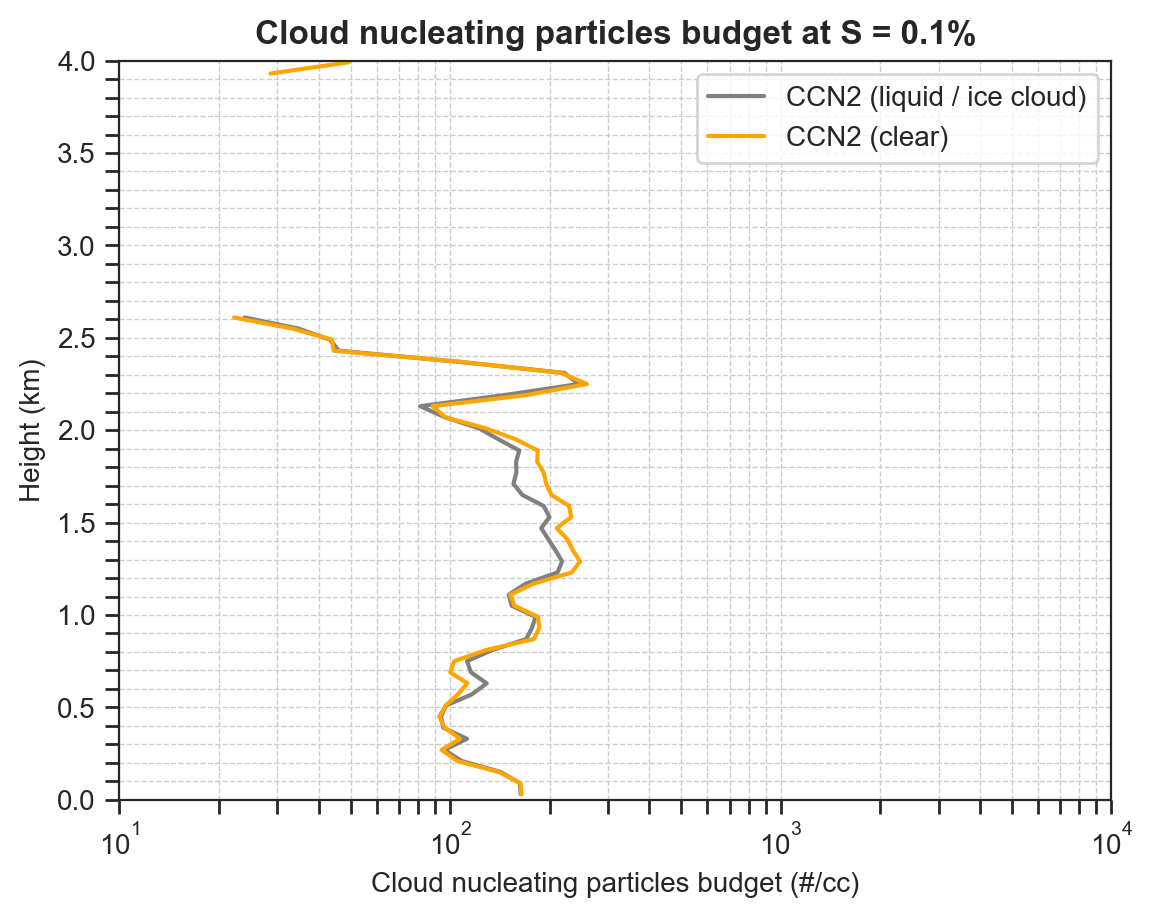

In [334]:
# CCN plotting
plt.figure(1)

# Create the plot
plt.plot(CCN2_cloudy, height, 'gray', label='CCN2 (liquid / ice cloud)')
plt.plot(CCN2_clear, height, 'orange', label='CCN2 (clear)')

plt.xscale('log')
plt.ylim([0, 4])
plt.xlim([10, 10000])

plt.tick_params(axis='both', which='both', length=5, width=1)
plt.minorticks_on()

plt.xlabel('Cloud nucleating particles budget (#/cc)')
plt.ylabel('Height (km)')

# plt.axhline(lowest_height, color = 'k', ls = 'dashed', label = 'Cloud base (0.69 km)')
# plt.axhline(highest_height, color = 'blue', ls = 'dashed', label = 'Cloud top (0.81 km)')

plt.legend()
plt.title('Cloud nucleating particles budget at S = 0.1%', weight = 'bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.show()